# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("Data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

### 1. Gráfique mediante un gráfico tipo scatter cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?

In [11]:
x1=df.loc[lambda x: x['grupo']=='Grupo_1']
x2=df.loc[lambda x: x['grupo']=='Grupo_2']
x3=df.loc[lambda x: x['grupo']=='Grupo_3']
x4=df.loc[lambda x: x['grupo']=='Grupo_4']

Text(0, 0.5, 'y1')

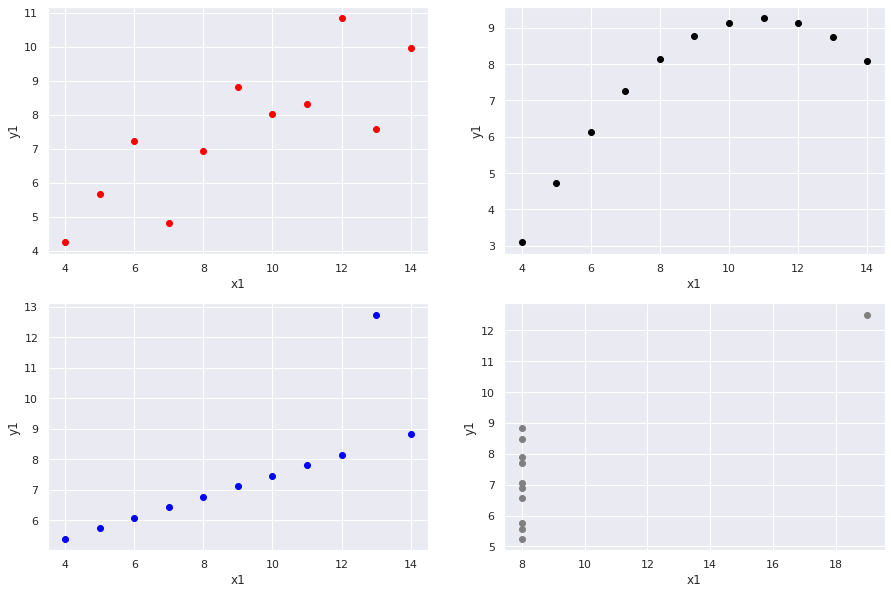

In [17]:
fig = plt.figure(figsize=(15, 10))


plt.subplot(2,2,1)
plt.scatter(x1['x'],x1['y'],c="red")
plt.xlabel('x1')
plt.ylabel('y1')

plt.subplot(2,2,2)
plt.scatter(x2['x'],x2['y'],c="black")
plt.xlabel('x1')
plt.ylabel('y1')

plt.subplot(2,2,3)
plt.scatter(x3['x'],x3['y'],c="blue")
plt.xlabel('x1')
plt.ylabel('y1')

plt.subplot(2,2,4)
plt.scatter(x4['x'],x4['y'],c="grey")
plt.xlabel('x1')
plt.ylabel('y1')


Vemos que son distintos tanto en su disperción como en la forma ue toman (linea recta, curva, linea vertical,etc).

In [14]:
x1['x']

0     10
1      8
2     13
3      9
4     11
5     14
6      6
7      4
8     12
9      7
10     5
Name: x, dtype: int64

### 2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando describe para cada grupo. Interprete.

In [18]:
x1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [19]:
x2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [20]:
x3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [21]:
x4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


### 3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

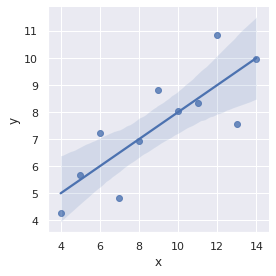

In [40]:
sns.lmplot(x='x',y='y',data=x1,height = 4)  
plt.show()

Vemos que se ajustó bastante bien, pero no perfectamente pues no sigue un compartamiento lineal

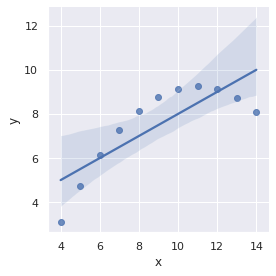

In [41]:
sns.lmplot(x='x',y='y',data=x2,height = 4) 
plt.show()

Vemos que no fue bueno el ajuste pues los datos seguían un comportamiento más bien curvo que recto

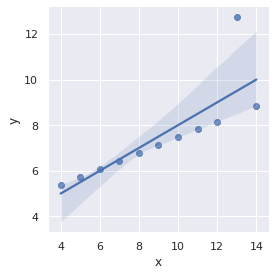

In [42]:
sns.lmplot(x='x',y='y',data=x3,height = 4) 
plt.show()

Si bien los datos se relacionaban linealmente, un valor atípico alejó la recta empeorando la regreción

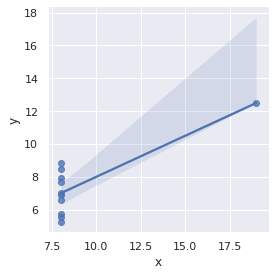

In [43]:
sns.lmplot(x='x',y='y',data=x4,height = 4)  
plt.show()

Nuevamente vemos como un dato atipico resulta en errores muy grandes cuando el ajuste sin este habría sido muy bueno.

### 4. Calcule los resultados de las métricas para cada grupo. Interprete.

Primero definimos las funciones de pérdida

In [106]:
def abs(x):
    return max(x,-x)

In [125]:
def MAE(x,y):
    n=len(x)
    suma=0
    for i in range(n):
        suma+=abs(x[i]-y[i])
    return suma/n

def MSE(x,y):
    n=len(x)
    suma=0
    for i in range(n):
        suma+=(x[i]-y[i])**2
    return suma/n


def MAPE(x,y):
    n=len(x)
    suma=0
    for i in range(n):
        suma+=abs(x[i]-y[i])/(x[i]**2+y[i]**2)**(1/2)
    return suma/n

def sMAPE(x,y):
    n=len(x)
    suma=0
    for i in range(n):
        suma+=abs(x[i]-y[i])/(x[i]**2+y[i]**2)
    return 2*suma/n



#### Grupo 1

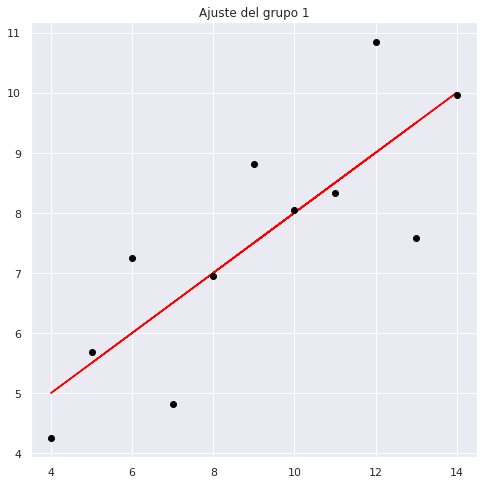

In [126]:
m1, n1 = np.polyfit(x1['x'], x1['y'], 1)

z=[]
for i in x1['x']:
    z.append(m1*i+n1)


fig = plt.figure(figsize=(8,8))
plt.plot(x1['x'],z, c='red')
plt.plot(x1['x'],x1['y'],'o', c='black')
plt.title('Ajuste del grupo 1')
plt.show()

In [127]:
print('La función de pérdida MAE tiene un valor de:', MAE(z,x1['y']) ,'\n'
     'La función de pérdida MSE tiene un valor de:', MSE(z,x1['y']) ,'\n'
     'La función de pérdida MAPE tiene un valor de:', MAPE(z,x1['y']) ,'\n'
     'La función de pérdida sMAPE tiene un valor de:', sMAPE(z,x1['y']))

La función de pérdida MAE tiene un valor de: 0.8374049586776863 
La función de pérdida MSE tiene un valor de: 1.2511536363636362 
La función de pérdida MAPE tiene un valor de: 0.08204630744998077 
La función de pérdida sMAPE tiene un valor de: 0.017090017093981016


#### Grupo 2

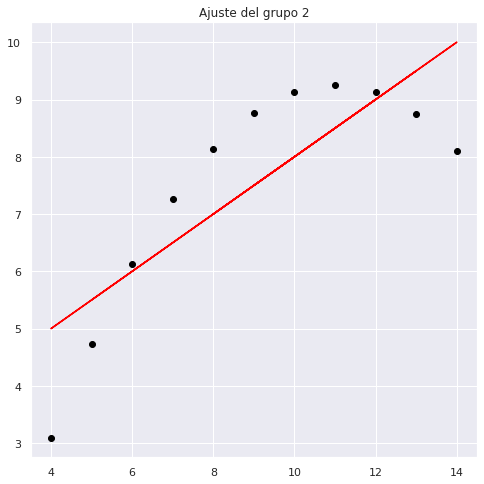

In [163]:
m2, n2 = np.polyfit(x2['x'], x2['y'], 1)

z2=[]
for i in x2['x']:
    z2.append(m2*i+n2)    
    

fig = plt.figure(figsize=(8,8))
plt.plot(x2['x'],z2, c='red')
plt.plot(x2['x'],x2['y'],'o', c='black')
plt.title('Ajuste del grupo 2')
plt.show()

In [143]:
k2=list(x2['y'])

print('La función de pérdida MAE tiene un valor de:', MAE(z2,k2) ,'\n'
     'La función de pérdida MSE tiene un valor de:', MSE(z2,k2) ,'\n'
     'La función de pérdida MAPE tiene un valor de:', MAPE(z2,k2) ,'\n'
     'La función de pérdida sMAPE tiene un valor de:', sMAPE(z2,k2))

La función de pérdida MAE tiene un valor de: 0.9679338842975203 
La función de pérdida MSE tiene un valor de: 1.2523900826446284 
La función de pérdida MAPE tiene un valor de: 0.10070446604730819 
La función de pérdida sMAPE tiene un valor de: 0.023245541223740153


#### Grupo 3

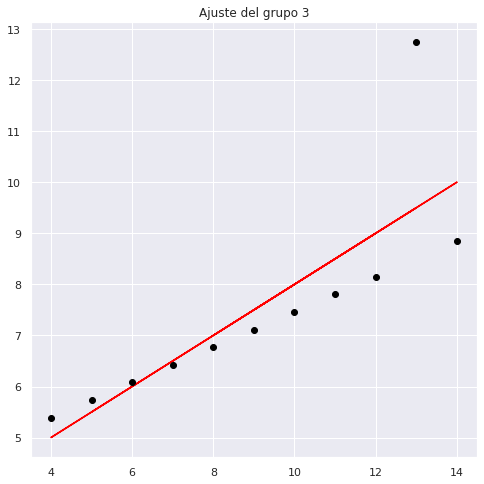

In [164]:
m3, n3 = np.polyfit(x3['x'], x3['y'], 1)

z3=[]
for i in x3['x']:
    z3.append(m3*i+n3)


fig = plt.figure(figsize=(8,8))
plt.plot(x3['x'],z3, c='red')
plt.plot(x3['x'],x3['y'],'o', c='black')
plt.title('Ajuste del grupo 3')
plt.show()

In [145]:
k3=list(x3['y'])


print('La función de pérdida MAE tiene un valor de:', MAE(z3,k3) ,'\n'
     'La función de pérdida MSE tiene un valor de:', MSE(z3,k3) ,'\n'
     'La función de pérdida MAPE tiene un valor de:', MAPE(z3,k3) ,'\n'
     'La función de pérdida sMAPE tiene un valor de:', sMAPE(z3,k3))

La función de pérdida MAE tiene un valor de: 0.7159669421487617 
La función de pérdida MSE tiene un valor de: 1.250562892561984 
La función de pérdida MAPE tiene un valor de: 0.057356666707264754 
La función de pérdida sMAPE tiene un valor de: 0.009769328725785177


#### Grupo 4

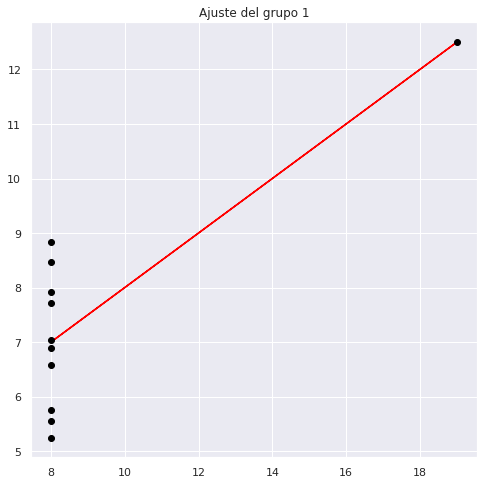

In [146]:
m4, n4 = np.polyfit(x4['x'], x4['y'], 1)

z4=[]
for i in x4['x']:
    z4.append(m4*i+n4)


fig = plt.figure(figsize=(8,8))
plt.plot(x4['x'],z4, c='red')
plt.plot(x4['x'],x4['y'],'o', c='black')
plt.title('Ajuste del grupo 4')
plt.show()

In [148]:
k4=list(x4['y'])


print('La función de pérdida MAE tiene un valor de:', MAE(z4,k4) ,'\n'
     'La función de pérdida MSE tiene un valor de:', MSE(z4,k4) ,'\n'
     'La función de pérdida MAPE tiene un valor de:', MAPE(z4,k4) ,'\n'
     'La función de pérdida sMAPE tiene un valor de:', sMAPE(z4,k4))

La función de pérdida MAE tiene un valor de: 0.9027272727272732 
La función de pérdida MSE tiene un valor de: 1.249317272727273 
La función de pérdida MAPE tiene un valor de: 0.09164599381756991 
La función de pérdida sMAPE tiene un valor de: 0.0188020540085755


### 5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.

En el grupo 3, si quitaramos el outlier, la recta mejoraría enormemente su ajuste, pues los demás datos sí se comportan de forma lineal, similar e el caso del grupo 4.